In [70]:
from IPython.display import HTML

In [71]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The code for this IPython notebook is hidden for easier reading.
To toggle on/off the code, please click <a href="javascript:code_toggle()">here</a>.''')

## 1. Real Networks and Random Networks - A Comparison

### a) Power Grid Network 
#### Network representing the Western States Power Grid of the United States. Each node is a power plant, transformer or consumer, and two nodes are connected if they are physically connected via a cable. Ref: Watts, D. J., & Strogatz, S. H. (1998). Collective dynamics of â€˜small-worldâ€™ networks. nature, 393(6684), 440-442.

#### Power Grid is part of Technological Networks and it is an undirected multi-graph.

In [1]:
# All libraries used
import networkx as nx
import pandas as pd
import numpy as np
import math

from scipy import sparse

import collections
from collections import Counter

import matplotlib.pyplot as plt

In [2]:
path = nx.read_edgelist("/Users/Any/Documents/DE_Jacobs University/Fall 2020/Network Theory/Exercises/networks/powergrid.edgelist.txt")

In [3]:
graph_type = nx.is_directed(path)
print("checking if it is a directed graph:", graph_type)

checking if it is a directed graph: False


In [4]:
graph = nx.Graph(path)
info_graph = nx.info(graph)
print("\033[1m"+"information on the graph\n",info_graph)

information on the graph
 Name: 
Type: Graph
Number of nodes: 4941
Number of edges: 6594
Average degree:   2.6691


In [5]:
nx.is_directed(graph)

False

### Graph

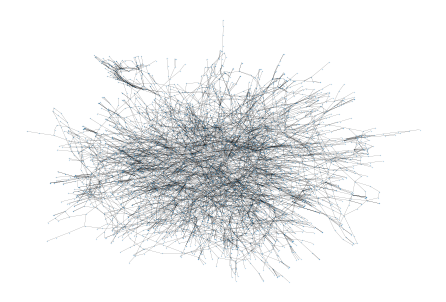

In [6]:
nx.draw(graph, pos=nx.spring_layout(graph), node_size=0.01, width=0.1)

In [7]:
n = graph.number_of_nodes()
print("\033[1m"+"Number of nodes:", n)

Number of nodes: 4941


In [8]:
m = graph.number_of_edges()
print("\033[1m"+"Number of edges:", m)

Number of edges: 6594


### Adjacency Matrix

In [9]:
A = nx.adjacency_matrix(graph)
print(A.todense())

[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


### Distribution of degree

[Text(19.4, 0, '19'),
 Text(18.4, 0, '18'),
 Text(14.4, 0, '14'),
 Text(13.4, 0, '13'),
 Text(12.4, 0, '12'),
 Text(11.4, 0, '11'),
 Text(10.4, 0, '10'),
 Text(9.4, 0, '9'),
 Text(8.4, 0, '8'),
 Text(7.4, 0, '7'),
 Text(6.4, 0, '6'),
 Text(5.4, 0, '5'),
 Text(4.4, 0, '4'),
 Text(3.4, 0, '3'),
 Text(2.4, 0, '2'),
 Text(1.4, 0, '1')]

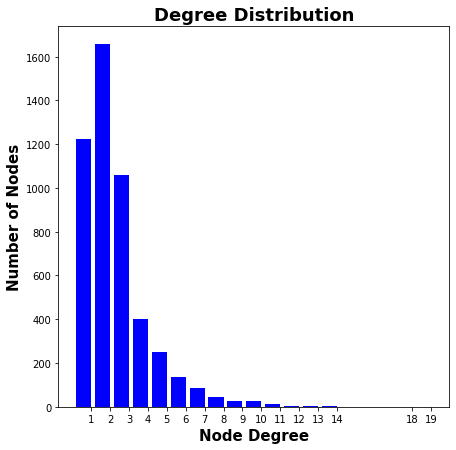

In [10]:
#Degree Distribution
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(7,7))
plt.bar(deg, cnt, width=0.8, color="b")

plt.title("Degree Distribution", fontsize=18, fontweight="bold")
plt.ylabel("Number of Nodes", fontsize=15, fontweight="bold")
plt.xlabel("Node Degree", fontsize=15, fontweight="bold")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

### Distribution of distance

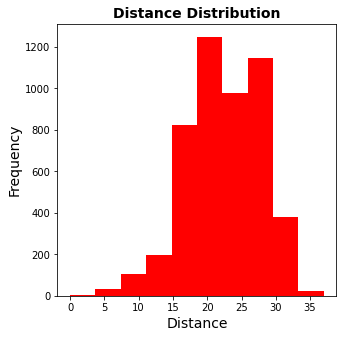

In [11]:
#Distance Distribution
dist = list(dict(nx.shortest_path_length(graph)).values())

x =[]
for d in dist:
    distanceCount = collections.Counter(d)
    x.append(distanceCount)
    distance, cnt = zip(*distanceCount.items())
    

fig, ax = plt.subplots(figsize=(5,5))    
plt.hist(cnt, color="r")

plt.title("Distance Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Distance", fontsize=14)
plt.show()

### Cumulative distribution of distance

<ipython-input-12-15c67c7bb8f9>:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts,bin_edges=np.histogram(cnt,bins=bins,normed=True)


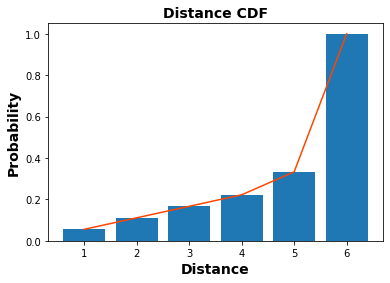

In [12]:
bins = [0,1,2,3,4,5,6]
#bins = k_avg
counts,bin_edges=np.histogram(cnt,bins=bins,normed=True)
cdf=np.cumsum(counts)
plt.bar(bin_edges[1:],cdf)
plt.plot(bin_edges[1:],cdf,color="orangered")
plt.xlabel("Distance", fontsize=14,fontweight='bold')
plt.ylabel("Probability", fontsize=14,fontweight='bold')
plt.title("Distance CDF", fontsize=14, fontweight='bold')
plt.show()

### Distribution of local clustering coefficient

(array([4.104e+03, 2.380e+02, 8.600e+01, 2.200e+02, 2.000e+01, 1.700e+01,
        3.200e+01, 2.000e+00, 1.000e+00, 2.210e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

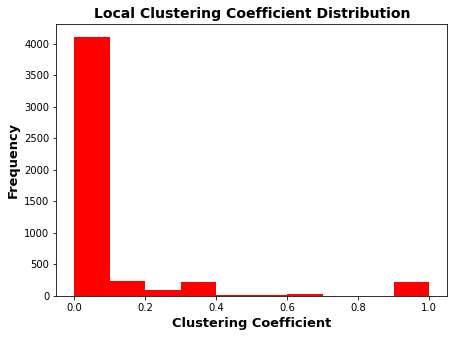

In [13]:
#Histogram of local clustering coefficient
clust_coeff_loc =nx.clustering(graph).values()

plt.subplots(figsize=(7,5))    
plt.title("Local Clustering Coefficient Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Clustering Coefficient", fontsize=13, fontweight='bold')
plt.ylabel("Frequency", fontsize=13, fontweight='bold')
plt.hist(clust_coeff_loc,color="red")

### Cumulative Distribution of local clustering coefficient

<ipython-input-14-c4faa8562f06>:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  cnt,bin_edges=np.histogram(loc_clustering_coeff,bins=bins,normed=True)


Text(0, 0.5, 'Probability')

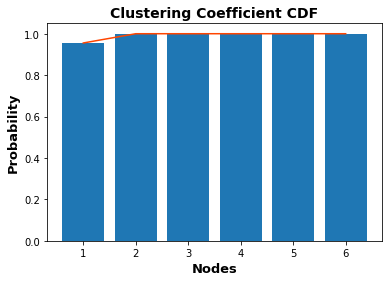

In [14]:
#Cumulative Distribution of local clustering coefficient
bins=[0,1,2,3,4,5,6]
loc_clustering_coeff = list(nx.clustering(graph).values())
cnt,bin_edges=np.histogram(loc_clustering_coeff,bins=bins,normed=True)
cdf=np.cumsum(cnt)
plt.bar(bin_edges[1:],cdf)
plt.plot(bin_edges[1:],cdf,color="orangered")
plt.title("Clustering Coefficient CDF", fontsize=14, fontweight='bold')
plt.xlabel("Nodes", fontsize=13, fontweight='bold')
plt.ylabel("Probability", fontsize=13, fontweight='bold')

(array([4.886e+03, 1.600e+01, 1.100e+01, 6.000e+00, 4.000e+00, 4.000e+00,
        6.000e+00, 3.000e+00, 3.000e+00, 2.000e+00]),
 array([2.58445349e-13, 2.86534500e-02, 5.73068999e-02, 8.59603499e-02,
        1.14613800e-01, 1.43267250e-01, 1.71920700e-01, 2.00574150e-01,
        2.29227600e-01, 2.57881050e-01, 2.86534500e-01]),
 <BarContainer object of 10 artists>)

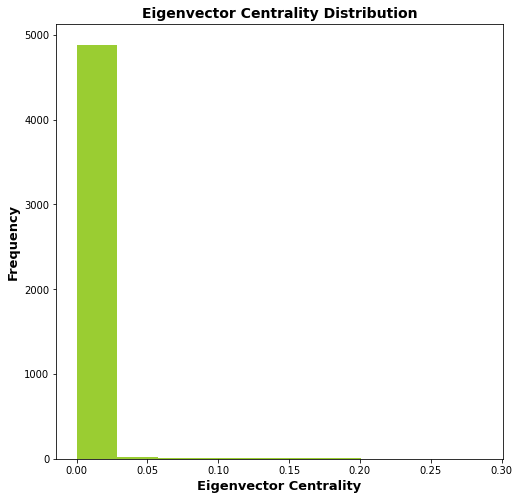

In [15]:
#EVC = nx.eigenvector_centrality(graph)
EVC_values = nx.eigenvector_centrality(graph).values()

plt.subplots(figsize=(8,8))    
plt.title("Eigenvector Centrality Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Eigenvector Centrality", fontsize=13, fontweight='bold')
plt.ylabel("Frequency", fontsize=13, fontweight='bold')
plt.hist(EVC_values,color="YellowGreen")

#### => Most nodes have an eigenvector centrality inferior to 0.05.

### => The graph is scale free
#### In fact, this network present a Power Law Distribution of node degrees k.

### Average Degree

In [16]:
avg_deg = sum([d for (n, d) in nx.degree(graph)]) / float(graph.number_of_nodes())
print("\033[1m"+"average degree=", avg_deg)

average degree= 2.66909532483303


### Typical Degree

In [17]:
sum_aver_degree = sum([x**2 for x in degree_sequence])
typ_node_degree = np.sqrt(sum_aver_degree/graph.number_of_nodes())
print("\033[1m"+"typical degree=", typ_node_degree)

typical degree= 3.214455812231946


### Average Distance

In [18]:
avg_dist = nx.average_shortest_path_length(graph)
print("\033[1m"+"average distance=", avg_dist)

average distance= 18.989185424445708


### Average Local Clustering Coefficient

In [19]:
avg_clustering = nx.average_clustering(graph)
print("\033[1m"+"average local clustering coefficient=", avg_clustering)

average local clustering coefficient= 0.08010361108159712


In [20]:
D = nx.diameter(graph)
print("\033[1m"+"Diameter of the graph:", D)

Diameter of the graph: 46


#### => The graph shows some of the characteristics of Small World behavior such as small average distance and existence of giant component; but no narrow degree distribution and high clustering are observed and small components cannot be generated.

### Nodes with the largest degree

In [21]:
print("\033[1m"+"Nodes with the largest degree:")
nodes_degree = nx.degree(graph)
sorted(nodes_degree, key=lambda x: x[1], reverse=True)

Nodes with the largest degree:


[('2553', 19),
 ('4458', 18),
 ('831', 14),
 ('3468', 14),
 ('4345', 14),
 ('2542', 13),
 ('2382', 13),
 ('2575', 13),
 ('2585', 13),
 ('3895', 13),
 ('1224', 12),
 ('2617', 12),
 ('2434', 12),
 ('2662', 12),
 ('2439', 12),
 ('2282', 11),
 ('490', 11),
 ('1005', 11),
 ('1334', 11),
 ('1309', 11),
 ('4332', 11),
 ('4381', 11),
 ('4395', 11),
 ('4373', 11),
 ('4352', 11),
 ('4384', 11),
 ('1030', 10),
 ('725', 10),
 ('1050', 10),
 ('1091', 10),
 ('1166', 10),
 ('1460', 10),
 ('1106', 10),
 ('1170', 10),
 ('1326', 10),
 ('2586', 10),
 ('2717', 10),
 ('2533', 10),
 ('2554', 10),
 ('3128', 10),
 ('2608', 10),
 ('2936', 10),
 ('2800', 10),
 ('2851', 10),
 ('3312', 10),
 ('3355', 10),
 ('3838', 10),
 ('4392', 10),
 ('4346', 10),
 ('4402', 10),
 ('4359', 10),
 ('4361', 10),
 ('98', 9),
 ('2548', 9),
 ('597', 9),
 ('854', 9),
 ('846', 9),
 ('1554', 9),
 ('1506', 9),
 ('1530', 9),
 ('2221', 9),
 ('2321', 9),
 ('2249', 9),
 ('2545', 9),
 ('2595', 9),
 ('2561', 9),
 ('2458', 9),
 ('2538', 9),
 ('2

### Nodes with the largest closeness centrality

In [22]:
print("\033[1m"+"Nodes with the largest closeness centrality:")
clos_centrality = nx.closeness_centrality(graph)
{k: v for k, v in sorted(clos_centrality.items(), key=lambda item: item[1],reverse=True)}

Nodes with the largest closeness centrality:


{'1308': 0.08182330142114155,
 '2594': 0.0809437981320662,
 '2605': 0.08035786905246035,
 '1131': 0.07987194619153098,
 '2606': 0.0796260477111541,
 '1243': 0.07932684587468285,
 '1476': 0.07918570169111165,
 '2557': 0.07911468426194328,
 '2528': 0.07877280265339967,
 '2532': 0.07803121248499399,
 '2612': 0.07802751496580373,
 '2543': 0.07802628253727571,
 '4219': 0.07729377894605081,
 '1125': 0.07720680170042511,
 '2618': 0.07718388200553099,
 '4164': 0.07683812664292047,
 '1267': 0.07680706500614146,
 '1383': 0.07676171237666071,
 '427': 0.0758192003683524,
 '426': 0.07577965607694549,
 '1307': 0.07572041692213366,
 '2909': 0.07557445766912461,
 '2486': 0.07547746371275783,
 '4120': 0.07544057909043707,
 '2953': 0.07505659632009967,
 '2607': 0.07479635405626382,
 '393': 0.07477031588188106,
 '2558': 0.07458517657361134,
 '384': 0.07455140878016389,
 '447': 0.07452778951179771,
 '1330': 0.07446151063412869,
 '2960': 0.07442673335944798,
 '1123': 0.0744121590070345,
 '2539': 0.07423101

### Nodes with the largest EV centrality

In [23]:
print("\033[1m"+"Nodes with the largest EV centrality:")
EVC = nx.eigenvector_centrality(graph)
{k: v for k, v in sorted(EVC.items(), key=lambda item: item[1],reverse=True)}

Nodes with the largest EV centrality:


{'4381': 0.2865344997425942,
 '4345': 0.2745147084801143,
 '4336': 0.24822112815712566,
 '4332': 0.24290464678318438,
 '4352': 0.23627243283037452,
 '4384': 0.22130755705306213,
 '4402': 0.2147571103970849,
 '4347': 0.21411168520513021,
 '4395': 0.1978298988369616,
 '4373': 0.1947891980144053,
 '4361': 0.1806594019218238,
 '4398': 0.18030431165936636,
 '4401': 0.1769891216690325,
 '4413': 0.17238777933320448,
 '4408': 0.16525008645918923,
 '4335': 0.15490721194549084,
 '4392': 0.14788656065923894,
 '4344': 0.14375527851707465,
 '4346': 0.13732144304754507,
 '4372': 0.13059913888887545,
 '4342': 0.12817131145492777,
 '4374': 0.12048782966754451,
 '4391': 0.11439991519650226,
 '4365': 0.11435143586313364,
 '4376': 0.1106787598550004,
 '4385': 0.10423045075224505,
 '4368': 0.09909914538218499,
 '4343': 0.09065917248452487,
 '4340': 0.08420032933891203,
 '4333': 0.08190570619528394,
 '4375': 0.07569257893145408,
 '4383': 0.07234297100529971,
 '4367': 0.07139136106782945,
 '4396': 0.0713679

### Nodes with the largest betweeness centrality

In [24]:
print("\033[1m"+"Nodes with the largest betweeness centrality:")
bw_centrality = nx.betweenness_centrality(graph)
{k: v for k, v in sorted(bw_centrality.items(), key=lambda item: item[1],reverse=True)}

Nodes with the largest betweeness centrality:


{'4164': 0.28841562147939637,
 '2543': 0.28169812331624505,
 '1243': 0.2796951897344538,
 '4219': 0.2776498877784976,
 '2528': 0.26730447500467724,
 '1267': 0.24827101665302145,
 '1308': 0.2365166910499439,
 '1244': 0.20523301004236488,
 '426': 0.2049539625669129,
 '2606': 0.20311626353593495,
 '2594': 0.19230583355335626,
 '2605': 0.1862957329429396,
 '69': 0.18412340121277393,
 '108': 0.17741564211788385,
 '1167': 0.17112033945509147,
 '4120': 0.1570788320418678,
 '2235': 0.15365409555455442,
 '70': 0.14786129147940616,
 '2223': 0.1327780171751506,
 '393': 0.13164241799743548,
 '1476': 0.13101098215425122,
 '1125': 0.13049406218773463,
 '427': 0.1304038492933685,
 '1131': 0.12390473132713033,
 '2557': 0.11575596560229243,
 '4207': 0.11564829740073125,
 '2312': 0.11384652493904933,
 '4206': 0.10875962587388315,
 '4199': 0.10811291908931796,
 '1166': 0.10677706608764755,
 '4837': 0.10649618555813582,
 '396': 0.10343301355652063,
 '4832': 0.09904553808424085,
 '2231': 0.0979184970347246

### Further analysis of the graph

In [25]:
num_components = nx.number_connected_components(graph)
print("\033[1m"+"number of components:", num_components)

number of components: 1


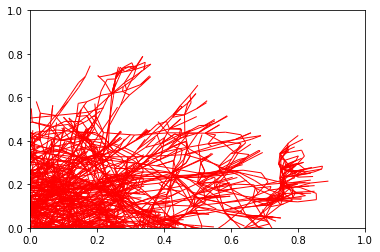

In [27]:
# identify largest connected component
pos = nx.spring_layout(graph)
Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
G0 = graph.subgraph(Gcc[0]) # G0 is the giant component
#nx.draw(G0)
#plt.title("Giant Component", fontsize=12, fontweight='bold')
nx.draw_networkx_edges(G0, pos, edge_color="r")
# show other connected components
for Gi in Gcc[1:]:
    if len(Gi) > 1:
        nx.draw_networkx_edges(
            graph.subgraph(Gi), pos, edge_color="r", alpha=0.3, width=5.0)
plt.show()

#### => There are no existence of small components, only a giant component.

Text(0.5, 1.0, 'Giant Component')

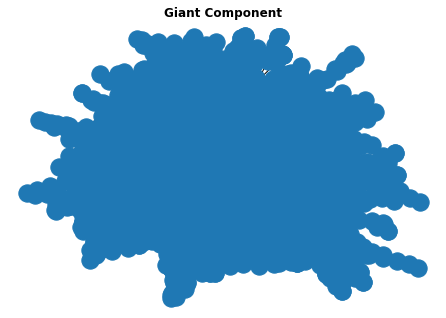

In [28]:
nx.draw(G0)
plt.title("Giant Component", fontsize=12, fontweight='bold')

In [29]:
D_giant = nx.diameter(G0)
print("\033[1m"+"Diameter of giant component:", D_giant)

Diameter of giant component: 46


In [30]:
S = 1 - (math.exp(-(avg_deg)))
print("\033[1m"+"Size of giant component:", S)

Size of giant component: 0.9306850955743141


### => It is supercritical.
#### The average degree k > 1, corresponding to a supercritical regime.

In [31]:
np.log(n)

8.50532301884575

### b) Random Network Model

#### Building a random network with G(n,m) where n = 4941 and m = 6594. n being the number of vertices and m the number of edges.

### Graph

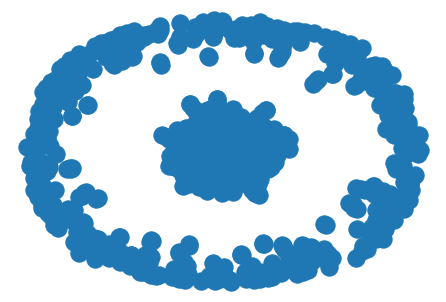

In [32]:
num_nodes = 4941
num_edges = 6594

#G = nx.erdos_renyi_graph(num_nodes,num_edges) 
G = nx.gnm_random_graph(num_nodes,num_edges)
nx.draw(G) 
plt.show()

#### => Existence of small components.

### Diameter / Average distance

#### The graph is not connected as it can be seen on the plot above. Thus, the diameter and average distance of the graph cannot be found. We can further look for the diameter and average distance of the giant component. Also the existence of small components can be observed.

In [33]:
num_components = nx.number_connected_components(G)
print("\033[1m"+"number of components:", num_components)

number of components: 372


### Adjacency Matrix

In [34]:
B = nx.adjacency_matrix(G)
print(B.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Degree distribution

[Text(12.4, 0, '12'),
 Text(11.4, 0, '11'),
 Text(10.4, 0, '10'),
 Text(9.4, 0, '9'),
 Text(8.4, 0, '8'),
 Text(7.4, 0, '7'),
 Text(6.4, 0, '6'),
 Text(5.4, 0, '5'),
 Text(4.4, 0, '4'),
 Text(3.4, 0, '3'),
 Text(2.4, 0, '2'),
 Text(1.4, 0, '1'),
 Text(0.4, 0, '0')]

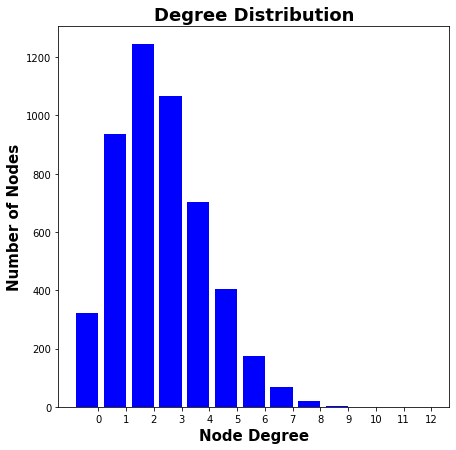

In [35]:
#Degree Distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(7,7))
plt.bar(deg, cnt, width=0.8, color="b")

plt.title("Degree Distribution", fontsize=18, fontweight="bold")
plt.ylabel("Number of Nodes", fontsize=15, fontweight="bold")
plt.xlabel("Node Degree", fontsize=15, fontweight="bold")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

### Distribution of distances

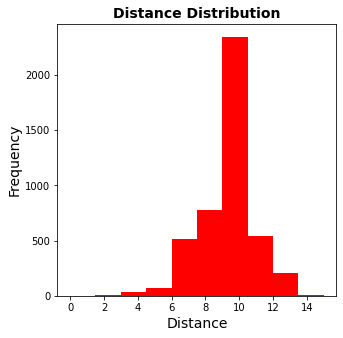

In [36]:
#Distance Distribution
dist = list(dict(nx.shortest_path_length(G)).values())

x =[]
for d in dist:
    distanceCount = collections.Counter(d)
    x.append(distanceCount)
    distance, cnt = zip(*distanceCount.items())
    

fig, ax = plt.subplots(figsize=(5,5))    
plt.hist(cnt, color="r")

plt.title("Distance Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Distance", fontsize=14)
plt.show()

### Cumulative distribution of distance

<ipython-input-37-15c67c7bb8f9>:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts,bin_edges=np.histogram(cnt,bins=bins,normed=True)


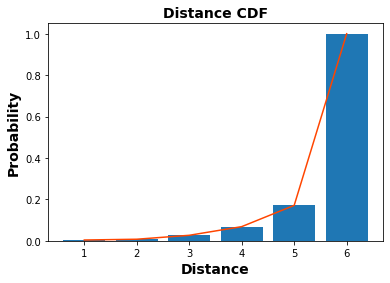

In [37]:
bins = [0,1,2,3,4,5,6]
#bins = k_avg
counts,bin_edges=np.histogram(cnt,bins=bins,normed=True)
cdf=np.cumsum(counts)
plt.bar(bin_edges[1:],cdf)
plt.plot(bin_edges[1:],cdf,color="orangered")
plt.xlabel("Distance", fontsize=14,fontweight='bold')
plt.ylabel("Probability", fontsize=14,fontweight='bold')
plt.title("Distance CDF", fontsize=14, fontweight='bold')
plt.show()

### Average local clustering coefficient

In [38]:
average_clust = nx.average_clustering(G)
print("\033[1m"+"average local clustering coefficient=", average_clust)

average local clustering coefficient= 0.0003103285434797275


### Distribution of clustering coefficient

(array([4.936e+03, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

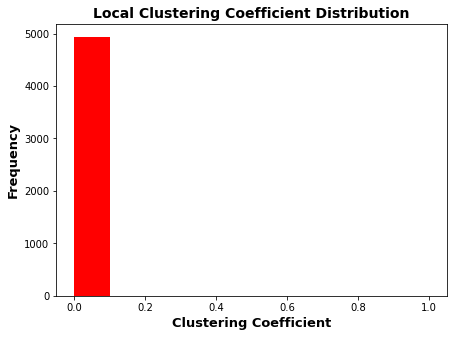

In [39]:
#Histogram of local clustering coefficient
clust_coeff_loc =nx.clustering(G).values()

plt.subplots(figsize=(7,5))    
plt.title("Local Clustering Coefficient Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Clustering Coefficient", fontsize=13, fontweight='bold')
plt.ylabel("Frequency", fontsize=13, fontweight='bold')
plt.hist(clust_coeff_loc,color="red")

### Cumulative Distribution of local clustering coefficient

<ipython-input-40-1f3bb2bfae7b>:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  cnt,bin_edges=np.histogram(loc_clustering_coeff,bins=bins,normed=True)


Text(0, 0.5, 'Probability')

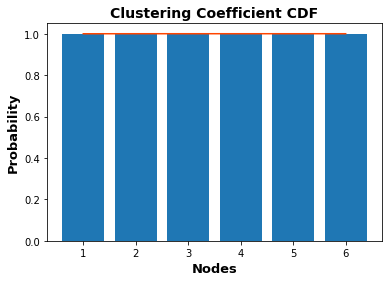

In [40]:
#Cumulative Distribution of local clustering coefficient
bins=[0,1,2,3,4,5,6]
loc_clustering_coeff = list(nx.clustering(G).values())
cnt,bin_edges=np.histogram(loc_clustering_coeff,bins=bins,normed=True)
cdf=np.cumsum(cnt)
plt.bar(bin_edges[1:],cdf)
plt.plot(bin_edges[1:],cdf,color="orangered")
plt.title("Clustering Coefficient CDF", fontsize=14, fontweight='bold')
plt.xlabel("Nodes", fontsize=13, fontweight='bold')
plt.ylabel("Probability", fontsize=13, fontweight='bold')

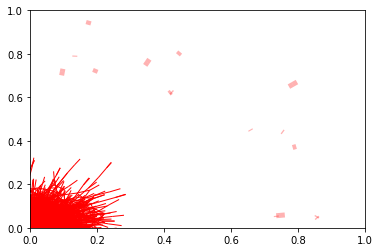

In [41]:
# identify largest connected component
pos = nx.spring_layout(G)
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0]) # G0 is the giant component
nx.draw_networkx_edges(G0, pos, edge_color="r")
# show other connected components
for Gi in Gcc[1:]:
    if len(Gi) > 1:
        nx.draw_networkx_edges(
            G.subgraph(Gi), pos, edge_color="r", alpha=0.3, width=5.0)
plt.show()

#### => Existence of small components and giant component.

Text(0.5, 1.0, 'Giant Component')

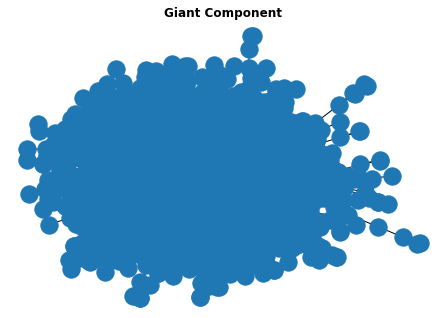

In [42]:
nx.draw(G0)
plt.title("Giant Component", fontsize=12, fontweight='bold')

In [43]:
Diameter = nx.diameter(G0)
print("\033[1m"+"Diameter of the giant component:", Diameter)

Diameter of the giant component: 20


### Average distance

In [44]:
avg_distance = nx.average_shortest_path_length(G0)
print("\033[1m"+"average distance=", avg_distance)

average distance= 8.459708080423765


### Average degree for the graph

In [45]:
avg_degree = sum([d for (n, d) in nx.degree(G)]) / float(G.number_of_nodes())
print("\033[1m"+"average degree=", avg_degree)

average degree= 2.66909532483303


### Average degree for the giant component

In [46]:
avg_degree2 = sum([d for (n, d) in nx.degree(G0)]) / float(G0.number_of_nodes())
print("\033[1m"+"average degree=", avg_degree2)

average degree= 2.8985571587125416


#### => The lager  the average degree is, the more vertices are connected forming a single larger component.
#### Existence of giant component at average degree = 2.8985571587125416.

In [47]:
S = 1 - (math.exp(-(avg_degree2)))
print("\033[1m"+"Size of giant component:", S)

Size of giant component: 0.9448973328689494


(array([4.855e+03, 6.300e+01, 1.100e+01, 9.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([-1.35606382e-17,  3.85823905e-02,  7.71647809e-02,  1.15747171e-01,
         1.54329562e-01,  1.92911952e-01,  2.31494343e-01,  2.70076733e-01,
         3.08659124e-01,  3.47241514e-01,  3.85823905e-01]),
 <BarContainer object of 10 artists>)

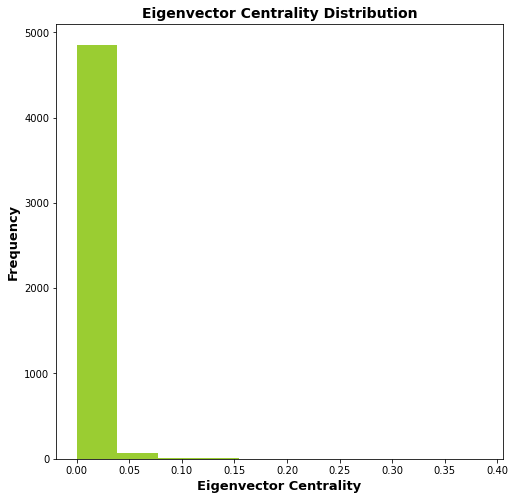

In [48]:
#EVC = nx.eigenvector_centrality(graph)
EVC_values = nx.eigenvector_centrality_numpy(G).values()

plt.subplots(figsize=(8,8))    
plt.title("Eigenvector Centrality Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Eigenvector Centrality", fontsize=13, fontweight='bold')
plt.ylabel("Frequency", fontsize=13, fontweight='bold')
plt.hist(EVC_values,color="YellowGreen")

### Nodes with largest EV centrality

In [49]:
print("\033[1m"+"Nodes with the largest EV centrality:")
EVC = nx.eigenvector_centrality_numpy(G)
{k: v for k, v in sorted(EVC.items(), key=lambda item: item[1],reverse=True)}

Nodes with the largest EV centrality:


{3936: 0.3858239046034314,
 1743: 0.3218203710231112,
 2612: 0.1543404495951729,
 3165: 0.15426642534051752,
 1385: 0.15103189981598023,
 1751: 0.1467321822911578,
 3911: 0.14292274444642028,
 4697: 0.14120056155157398,
 925: 0.13816241609390217,
 1909: 0.1373692441674594,
 3989: 0.12917972562874883,
 2092: 0.12699575372529312,
 3098: 0.1097880388198316,
 3580: 0.10692416494569626,
 2554: 0.10655280321340979,
 2088: 0.10521939182347041,
 3126: 0.10034981195622351,
 336: 0.09903298301392267,
 4849: 0.09201288856993638,
 3090: 0.0920128885699363,
 4898: 0.0920128885699363,
 203: 0.09126811608455544,
 1511: 0.08653281794336791,
 3057: 0.07702088832922306,
 2171: 0.07324968767763354,
 539: 0.06944135810268622,
 2089: 0.06518188601818622,
 2284: 0.0627865987911571,
 2517: 0.06272928641566891,
 3832: 0.060968052710155235,
 897: 0.06083871973787131,
 3703: 0.060210259039818276,
 575: 0.05995921142435529,
 3203: 0.05784961154385532,
 2353: 0.057479053542050365,
 3539: 0.056468705323624045,
 84

### Nodes with the largest degree

In [50]:
print("\033[1m"+"Nodes with the largest degree:")
nodes_degree = nx.degree(G)
sorted(nodes_degree, key=lambda x: x[1], reverse=True)

Nodes with the largest degree:


[(3936, 12),
 (1909, 11),
 (3120, 10),
 (1743, 9),
 (3639, 9),
 (4283, 9),
 (71, 8),
 (380, 8),
 (565, 8),
 (1185, 8),
 (1415, 8),
 (1478, 8),
 (1898, 8),
 (2043, 8),
 (2387, 8),
 (2852, 8),
 (2883, 8),
 (3057, 8),
 (3224, 8),
 (3270, 8),
 (3832, 8),
 (4116, 8),
 (4270, 8),
 (4536, 8),
 (4686, 8),
 (4936, 8),
 (0, 7),
 (1, 7),
 (85, 7),
 (291, 7),
 (300, 7),
 (440, 7),
 (463, 7),
 (517, 7),
 (528, 7),
 (554, 7),
 (567, 7),
 (575, 7),
 (597, 7),
 (668, 7),
 (738, 7),
 (848, 7),
 (938, 7),
 (947, 7),
 (1051, 7),
 (1072, 7),
 (1175, 7),
 (1190, 7),
 (1197, 7),
 (1348, 7),
 (1385, 7),
 (1436, 7),
 (1486, 7),
 (1555, 7),
 (1556, 7),
 (1610, 7),
 (1662, 7),
 (1764, 7),
 (2089, 7),
 (2096, 7),
 (2131, 7),
 (2175, 7),
 (2353, 7),
 (2538, 7),
 (2559, 7),
 (2746, 7),
 (3209, 7),
 (3227, 7),
 (3278, 7),
 (3287, 7),
 (3341, 7),
 (3353, 7),
 (3379, 7),
 (3580, 7),
 (3640, 7),
 (3697, 7),
 (3844, 7),
 (3851, 7),
 (3984, 7),
 (4015, 7),
 (4102, 7),
 (4200, 7),
 (4210, 7),
 (4311, 7),
 (4418, 7),
 (44

## Similarities and differences between this random network model and the power grid network:

#### . Power Law degree distribution observed for both power grid network and random network model
#### . These 2 networks are both Scale Free Networks
#### . With the average degree > 1  and 0 < S < 1 for both networks, it is a supercritical case for each network
#### . Existence of giant component in both of the networks
#### . The diameter of random network is much smaller than the diameter of power grid network
#### . The giant component size of the random network is slightly larger than the giant component size of the power grid network
#### . On the other hand, the average degree of the power grid network (which is the giant component)  is the same as the average degree of the random network. Both average degrees = 2.66909532483303
#### . Existence of small components for the random network model while no small components are observed for power grid network
#### . The average distance of the random network model is much smaller than that of the power grid network
#### . Power grid network clustering higher than that of random network model
#### . The largest degree for the random network model is smaller than the EV centrality for the power grid network
#### .The largest EV centrality for the power grid network is smaller than the largest EV centrality for the random network

### Let's narrow down some important characteristic properties of these networks:           
               
               Power Grid Network                                             
          - Degree distribution has a power law
            distribution
          - Small average distance 
          - Larger clustering coefficient
          - Non-existence of small components
          - Always existence of giant component
          
             
          
               Random Network model
          - Power law degree distribution successful to describe 
            supercritical real networks
          - Smaller average distance than the power grid network
          - Lower clustering
          - Existence of small components but their size cannot
            be generated
          - Existence of giant component
          

#### => According to these properties observed above, we can suggest that the random network model built has the properties of a "Configuration Network Model" while the power grid network has the properties of a "preferential attachment model" which successfully describes real networks compare to other networks. Also note that the Configuration Network Model is considered to be a more realistic random network model.